<h2> 3. Preprocessing </h2>

Now, the data will be preprocessed before developing machine learning models.


In [1]:
#download required libraries
!pip install scikit-learn==1.1.0

In [2]:
#check sklearn version
import sklearn
print(sklearn.__version__)

1.1.0


In [3]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("data/bank_marketing2.csv")
print(df.shape)
df.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h3> 2.1. Preparing Training and Test Sets </h3>

First, training and test sets will be prepared.

In [5]:
#Spliting input variables from the output variable
X = df.drop("y", axis = 1)
print(X.shape)
y = df["y"]
print(y.shape)

(41176, 20)
(41176,)


Since duration column can cause data leakage. It will be dropped as an input variable.

In [6]:
X = X.drop("duration", axis = 1)
print(X.shape)

(41176, 19)


In [7]:
#Using 20% of the data in the test set
#Using stratify = y since y is imbalanced and this imbalance should be preserved for both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32940, 19)
(8236, 19)
(32940,)
(8236,)


<h3> 2.2. Encoding Categorical Variables </h3>

Since we have a significant number of categorical columns (i.e. 11 object columns), I will start by examining and encoding them.

Let's start by observing the number of unique values each categorical variable has.

In [9]:
#check number of unique values in y_train & y_test
print(y_train.describe(include= "object"), "\n")
print(y_test.describe(include = "object"))
y_train.head()

count     32940
unique        2
top          no
freq      29229
Name: y, dtype: object 

count     8236
unique       2
top         no
freq      7308
Name: y, dtype: object


36444     no
1233     yes
24104     no
15513     no
17912     no
Name: y, dtype: object

In [10]:
#map yes to 1 and no to 0
y_train = y_train.map({"yes":1,
                       "no":0,
                       1:1,
                       0:0},
                      na_action=None)
y_test = y_test.map({"yes":1,
                     "no":0,
                     1:1,
                     0:0},
                    na_action=None)

#check y_train & y_test again
print(y_train.describe(), "\n")
print(y_test.describe())

count    32940.000000
mean         0.112659
std          0.316181
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64 

count    8236.000000
mean        0.112676
std         0.316216
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: y, dtype: float64


In [11]:
#check number of unique values in X_train & X_test
print("X_train:\n", X_train.describe(include="object"), "\n\n")
print("X_test:\n",X_test.describe(include="object"))

X_train:
            job  marital          education default housing   loan   contact  \
count    32940    32940              32940   32940   32940  32940     32940   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq      8269    19915               9721   26081   17278  27157     20939   

        month day_of_week     poutcome  
count   32940       32940        32940  
unique     10           5            3  
top       may         thu  nonexistent  
freq    11019        6839        28431   


X_test:
            job  marital          education default housing  loan   contact  \
count     8236     8236               8236    8236    8236  8236      8236   
unique      12        4                  7       3       3     3         2   
top     admin.  married  university.degree      no     yes    no  cellular   
freq      2150     5006               2443    6496    4293  6781 

In both X_train and X_test sets, we see that the column shows two values for the mode of contact with the customer. It's either telephone or cellular.
Similar to what was done with variable y, we can map cellular to 1 and telephone to 0 since we have 2 values only.

In [12]:
#map cellular to 1 and telephone to 0
X_train["contact"] = X_train["contact"].map({"cellular":1,
                                             "telephone":0,
                                             1:1,
                                             0:0},
                                            na_action=None)

X_test["contact"] = X_test["contact"].map({"cellular":1,
                                           "telephone":0,
                                           1:1,
                                           0:0},
                                          na_action=None)

In [13]:
#check the transformed column
print("X_train: \n# cellular:", sum(X_train["contact"]==1), "\n# telephone:", sum(X_train["contact"]==0))
print("X_test: \n# cellular:", sum(X_test["contact"]==1), "\n# telephone:", sum(X_test["contact"]==0))

X_train: 
# cellular: 20939 
# telephone: 12001
X_test: 
# cellular: 5196 
# telephone: 3040



Mapping categorical columns with only 2 levels is relatively easy and straight-forward. For categorical columns with 3 or more levels, I will use one-hot encoding to encode them.

In [14]:
#define categorical and numerical columns
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "month", "day_of_week", "poutcome"]
num_cols = list(X_train.select_dtypes(exclude = "object").columns)
num_cols

['age',
 'contact',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [15]:
#encode using one-hot encoding
onehot = OneHotEncoder(handle_unknown='error', drop='first', sparse=False)
onehot_train = pd.DataFrame(onehot.fit_transform(X_train[cat_cols]))
onehot_test = pd.DataFrame(onehot.transform(X_test[cat_cols]))

onehot_cols = onehot.get_feature_names_out(input_features = cat_cols)
print(onehot_cols, "\n")
onehot_train.index = X_train.index
onehot_test.index = X_test.index
print("# One-Hot-encoded columns:", len(onehot_cols))
onehot_train.columns = onehot_cols
onehot_test.columns = onehot_cols

print(onehot_train.shape)
print(onehot_test.shape)

onehot_train

['job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_retired' 'job_self-employed' 'job_services' 'job_student'
 'job_technician' 'job_unemployed' 'job_unknown' 'marital_married'
 'marital_single' 'marital_unknown' 'education_basic.6y'
 'education_basic.9y' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'default_unknown' 'default_yes' 'housing_unknown'
 'housing_yes' 'loan_unknown' 'loan_yes' 'month_aug' 'month_dec'
 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct'
 'month_sep' 'day_of_week_mon' 'day_of_week_thu' 'day_of_week_tue'
 'day_of_week_wed' 'poutcome_nonexistent' 'poutcome_success'] 

# One-Hot-encoded columns: 42
(32940, 42)
(8236, 42)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
36444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1233,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24104,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17912,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33257,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
22707,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6970,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
#drop categorical columns in  X_train & X_test
X_train = X_train.drop(cat_cols, axis=1)
print(X_train.shape)
X_test = X_test.drop(cat_cols, axis=1)
print(X_test.shape)

(32940, 10)
(8236, 10)


In [17]:
#add one-hot-encoded columns to X_train & X_test
X_train = pd.concat([X_train, onehot_train], axis=1)
print(X_train.shape)
X_test = pd.concat([X_test, onehot_test], axis=1)
print(X_test.shape)

(32940, 52)
(8236, 52)


In [18]:
X_train

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
36444,24,1,2,999,1,-2.9,92.963,-40.8,1.262,5076.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1233,32,0,1,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24104,33,0,1,999,0,-0.1,93.200,-42.0,4.245,5195.8,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15513,38,0,4,999,0,1.4,93.918,-42.7,4.957,5228.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17912,39,1,4,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33257,26,0,1,999,0,-1.8,92.893,-46.2,1.291,5099.1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
22707,35,1,5,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6970,32,0,1,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18498,34,1,1,999,0,1.4,93.918,-42.7,4.968,5228.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


After one-hot encoding, we have 52 columns in total in X_train & X_test.

<h3> 2.3. Principle Component Analysis </h3>

In the Exploratory Data Analysis (EDA) part, we saw that some of the numerical variables are highly correlated. Let's use principal component analysis (PCA) to extract principal components.

In [19]:
#Print numerical columns
num_cols

['age',
 'contact',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [20]:
#Get X_train mean & stds
print(X_train[num_cols])
X_train_mean = X_train[num_cols].mean(axis=0)
print(X_train_mean)
X_train_std = X_train[num_cols].std(axis=0)
print(X_train_std)

       age  contact  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
36444   24        1         2    999         1          -2.9          92.963   
1233    32        0         1    999         0           1.1          93.994   
24104   33        0         1    999         0          -0.1          93.200   
15513   38        0         4    999         0           1.4          93.918   
17912   39        1         4    999         0           1.4          93.918   
...    ...      ...       ...    ...       ...           ...             ...   
33257   26        0         1    999         0          -1.8          92.893   
22707   35        1         5    999         0           1.4          93.444   
6970    32        0         1    999         0           1.1          93.994   
18498   34        1         1    999         0           1.4          93.918   
24783   35        1         1    999         0          -0.1          93.200   

       cons.conf.idx  euribor3m  nr.emp

In [21]:
#first scale X_train & X_test before applying PCA


X_train_scaled = (X_train[num_cols] - X_train_mean)/X_train_std
X_test_scaled = (X_test[num_cols] - X_train_mean)/X_train_std #use X_train mean and std to avoid overfitting

X_train_scaled, X_test_scaled

(            age   contact  campaign     pdays  previous  emp.var.rate  \
 36444 -1.532248  0.757049 -0.202876  0.195024  1.657110     -1.896359   
 1233  -0.766943 -1.320878 -0.563891  0.195024 -0.348593      0.648975   
 24104 -0.671280 -1.320878 -0.563891  0.195024 -0.348593     -0.114625   
 15513 -0.192964 -1.320878  0.519153  0.195024 -0.348593      0.839875   
 17912 -0.097301  0.757049  0.519153  0.195024 -0.348593      0.839875   
 ...         ...       ...       ...       ...       ...           ...   
 33257 -1.340922 -1.320878 -0.563891  0.195024 -0.348593     -1.196392   
 22707 -0.479954  0.757049  0.880167  0.195024 -0.348593      0.839875   
 6970  -0.766943 -1.320878 -0.563891  0.195024 -0.348593      0.648975   
 18498 -0.575617  0.757049 -0.563891  0.195024 -0.348593      0.839875   
 24783 -0.479954  0.757049 -0.563891  0.195024 -0.348593     -0.114625   
 
        cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
 36444       -1.057187      -0.062686  -1.3572

In [22]:
#Create principal components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

X_train_pca.shape

#Convert to dataframe
component_names = ["PC" + str(i) for i in range(1, X_train_pca.shape[1]+1)]
X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
X_train_pca.index = X_train.index


print(X_train_pca.shape)
X_train_pca.head()

(32940, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
36444,3.144530,-0.344142,0.902249,-0.605122,0.848192,-0.600353,1.165588,0.067046,-0.478336,0.131005
1233,-1.600563,0.623802,0.056222,-1.143848,0.938860,0.026098,0.061782,-0.049219,0.074777,0.056704
24104,-0.457745,-0.348367,0.197283,-0.907743,0.692447,0.371665,-0.120112,-1.270399,0.085350,0.229013
15513,-1.845231,0.102431,0.673637,0.207928,0.287900,0.582937,-0.059140,-0.663643,0.140442,-0.005697
17912,-1.290555,-0.532470,0.531713,0.499769,-0.884277,-0.464229,-0.081670,0.339527,-0.040795,0.018840


In [23]:
#apply PCA to X_test
X_test_pca = pca.transform(X_test_scaled)

#Convert to dataframe
component_names = ["PC" + str(i) for i in range(1, X_test_pca.shape[1]+1)]
X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
X_test_pca.index = X_test.index


print(X_test_pca.shape)
X_test_pca.head()

(8236, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
8489,-2.537550,0.359514,1.983559,3.241256,1.573133,0.053831,0.001676,0.043795,-0.229928,-0.114138
40832,3.643608,4.151640,1.990780,-0.475264,-0.133455,-0.781165,-2.283637,1.550654,0.376015,0.023270
35671,2.824339,-0.577797,0.819666,0.364489,-0.266946,0.260606,1.062775,-0.382743,0.060516,-0.093355
35984,2.273988,-1.631360,0.580149,-0.245051,0.320108,0.195346,-0.418327,-0.069764,0.074794,-0.076469
21954,-1.079107,-0.343803,-0.136907,-0.587969,-0.150550,-1.667951,0.088189,0.127509,0.122137,-0.084929


In [24]:
#get explained variance ratios
pca.explained_variance_ratio_

array([0.41264045, 0.14307026, 0.1083304 , 0.09799118, 0.08739732,
       0.08232154, 0.03868726, 0.02645354, 0.00205326, 0.00105478])

In [25]:
#get cumulative sum of explained variance ratios
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
pca_cumsum

array([0.41264045, 0.55571071, 0.66404112, 0.7620323 , 0.84942962,
       0.93175116, 0.97043842, 0.99689196, 0.99894522, 1.        ])

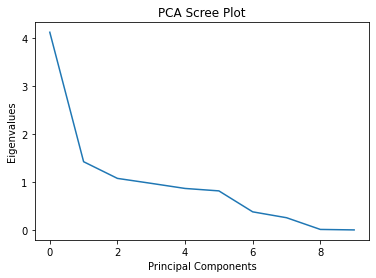

In [26]:
#Scree plot for PCA
plt.ylabel("Eigenvalues")
plt.xlabel("Principal Components")
plt.title("PCA Scree Plot")
plt.plot(pca.explained_variance_)

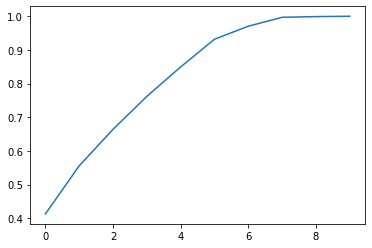

In [27]:
plt.plot(pca_cumsum)

Looking at the cumulative sums of the explained variance as well as the plot, we can pick first 6 principal components and drop the remaining 4 to focus on.

In [28]:
X_train_pca = X_train_pca.iloc[:, :6]
print(X_train_pca.shape)
print(X_train_pca.head())
X_test_pca = X_test_pca.iloc[:, :6]
print(X_test_pca.shape)
print(X_test_pca.head())

(32940, 6)
            PC1       PC2       PC3       PC4       PC5       PC6
36444  3.144530 -0.344142  0.902249 -0.605122  0.848192 -0.600353
1233  -1.600563  0.623802  0.056222 -1.143848  0.938860  0.026098
24104 -0.457745 -0.348367  0.197283 -0.907743  0.692447  0.371665
15513 -1.845231  0.102431  0.673637  0.207928  0.287900  0.582937
17912 -1.290555 -0.532470  0.531713  0.499769 -0.884277 -0.464229
(8236, 6)
            PC1       PC2       PC3       PC4       PC5       PC6
8489  -2.537550  0.359514  1.983559  3.241256  1.573133  0.053831
40832  3.643608  4.151640  1.990780 -0.475264 -0.133455 -0.781165
35671  2.824339 -0.577797  0.819666  0.364489 -0.266946  0.260606
35984  2.273988 -1.631360  0.580149 -0.245051  0.320108  0.195346
21954 -1.079107 -0.343803 -0.136907 -0.587969 -0.150550 -1.667951


Let's first save X_train & y_train as well as X_test & y_test in case we can use them in models without using pca-derived features.

In [29]:
# concatenate X_train & y_train
train_set = pd.concat([X_train, y_train], axis=1)
print(train_set.shape)
# concatenate X_test & y_test
test_set = pd.concat([X_test, y_test], axis=1)
print(test_set.shape)

(32940, 53)
(8236, 53)


In [30]:
#save train_set & test_set as csv
train_set.to_csv('data/train_set.csv', index=False)
test_set.to_csv('data/test_set.csv', index=False)

Now, numerical columns will be removed and PCA-derived columns will be added to the train and test sets which will be saved as csv later.

In [31]:
# concatenate X_train & y_train
temp_X_train = train_set.drop(num_cols, axis=1)
print(temp_X_train.shape)
print(temp_X_train.head())

train_pca_set = pd.concat([X_train_pca, temp_X_train], axis=1, ignore_index=True)
train_cols = X_train_pca.columns.append(temp_X_train.columns)
train_pca_set.columns = train_cols
print(train_pca_set.shape)
print(train_pca_set.head())

# concatenate X_test & y_test
temp_X_test = test_set.drop(num_cols, axis=1)
print(temp_X_test.shape)
print(temp_X_test.head())

test_pca_set = pd.concat([X_test_pca, temp_X_test], axis=1, ignore_index=True)
test_cols = X_test_pca.columns.append(temp_X_test.columns)
test_pca_set.columns = test_cols
print(test_pca_set.shape)
print(test_pca_set.head())

(32940, 43)
       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
36444              0.0               0.0            0.0             0.0   
1233               1.0               0.0            0.0             0.0   
24104              0.0               0.0            0.0             0.0   
15513              0.0               1.0            0.0             0.0   
17912              0.0               0.0            0.0             0.0   

       job_retired  job_self-employed  job_services  job_student  \
36444          0.0                0.0           0.0          0.0   
1233           0.0                0.0           0.0          0.0   
24104          0.0                1.0           0.0          0.0   
15513          0.0                0.0           0.0          0.0   
17912          0.0                0.0           1.0          0.0   

       job_technician  job_unemployed  ...  month_nov  month_oct  month_sep  \
36444             1.0             0.0  ...       

In [32]:
#save train_pca_set & test_pca_set as csv
train_pca_set.to_csv('data/train_pca_set.csv', index=False)
test_pca_set.to_csv('data/test_pca_set.csv', index=False)

The following Jupyter notebook will incorporate Data Preprocessing steps and the Modeling phase for some machine learning models.